<a href="https://colab.research.google.com/github/llazdll/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [2]:
torch.__version__

'2.9.0+cpu'

# **DataSet**

In [3]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [4]:
X = salary['Experience Years'].values
y = salary['Salary'].values
X, y

(array([ 1.1,  1.2,  1.3,  1.5,  2. ,  2.2,  2.5,  2.9,  3. ,  3.2,  3.2,
         3.5,  3.7,  3.8,  3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,
         5.1,  5.3,  5.5,  5.9,  6. ,  6.2,  6.5,  6.8,  7.1,  7.9,  8.2,
         8.5,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  42774,  46205,  37731,  43525,  39891,  48266,  56642,
         60150,  54445,  64445,  60000,  57189,  60200,  63218,  55794,
         56957,  57081,  59095,  61111,  64500,  67938,  66029,  83088,
         82200,  81363,  93940,  91000,  90000,  91738,  98273, 101302,
        113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28,), (28,), (12,), (12,))

In [6]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28, 1), (28, 1), (12, 1), (12, 1))

**Data Plot**

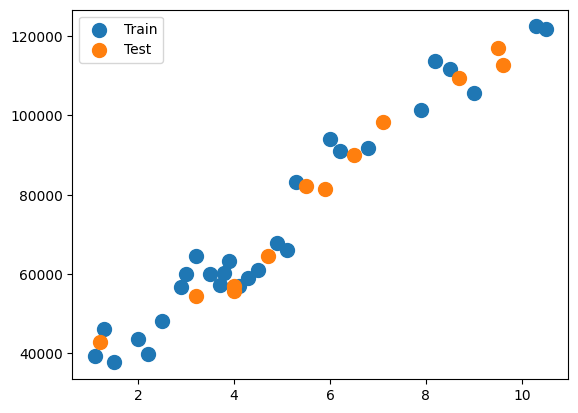

In [7]:
plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)

plt.legend(['Train', 'Test']);

In [8]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

In [9]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

In [10]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [11]:
y_scaler.inverse_transform(y_test)

array([[ 42774.],
       [ 55794.],
       [ 98273.],
       [ 82200.],
       [ 81363.],
       [116969.],
       [112635.],
       [109431.],
       [ 54445.],
       [ 56957.],
       [ 64500.],
       [ 90000.]])

**Standardization Data**

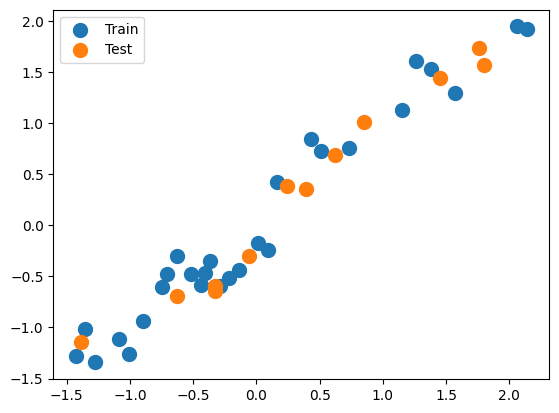

In [12]:
plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)

plt.legend(['Train', 'Test']);

In [13]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([28, 1]),
 torch.Size([28, 1]),
 torch.Size([12, 1]),
 torch.Size([12, 1]))

# **Model**

In [14]:
def linear_regression(x, theta0, theta1):
  y_hat = x * theta1 + theta0
  return y_hat

In [15]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

y_hat = linear_regression(X_train, theta0, theta1)
y_hat.shape

tensor([-0.6910]) tensor([-0.3651])


torch.Size([28, 1])

In [16]:
# testing linear_regression model
linear_regression(1, 2, -2)

0

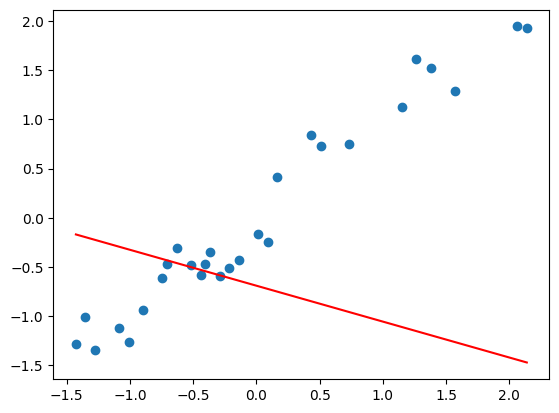

In [17]:
Xr = torch.linspace(X_train.min(), X_train.max(), 100).unsqueeze(1)
y_hat = linear_regression(Xr, theta0, theta1)

plt.scatter(X_train, y_train)
plt.plot(Xr, y_hat, color='red')

Linear regression oop


In [18]:
class LinearRegression:

  def __init__(self):
    self.theta0 = torch.randn(1)
    self.theta1 = torch.randn(1)

  def __call__(self, x):
    y_hat = x * self.theta1 + self.theta0
    return y_hat

  def __repr__(self):
    return "Linear Regression by DF"

In [19]:
model = LinearRegression()
model.theta0, model.theta1

(tensor([-0.5756]), tensor([-0.4655]))

In [20]:
model(X_train).shape

torch.Size([28, 1])

## loss

In [21]:
y_hat = model(X_train)
y_hat.shape

torch.Size([28, 1])

In [22]:
def mse(y_hat, y):
  return torch.mean((y_hat - y)**2)

In [23]:
loss = mse(y_hat, y_train)
loss

tensor(2.4560)

In [24]:
theta0 = 0
theta1 = torch.linspace(-10, 10, 100)

loss = torch.zeros(len(theta1))

for i, t1 in enumerate(theta1):
  y_hat = linear_regression(X_train, theta0, theta1=t1)
  loss[i] = mse(y_hat, y_train)

loss.shape

torch.Size([100])

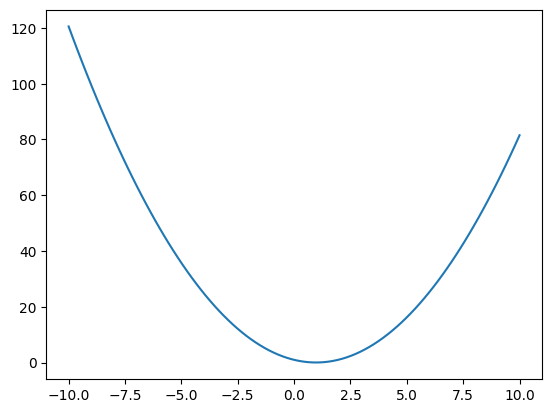

In [25]:
plt.plot(theta1, loss)

In [26]:
idx = torch.argmin(loss)
theta1[idx]

tensor(0.9091)

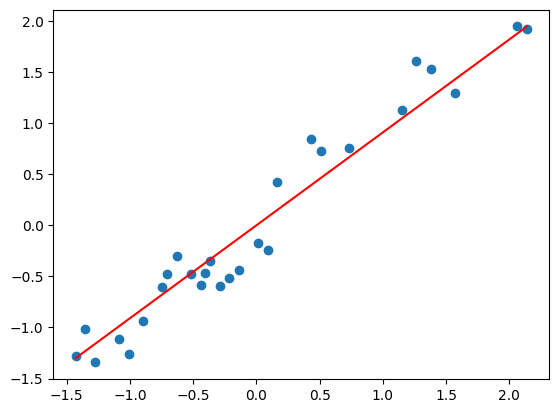

In [27]:
plt.scatter(X_train, y_train)

y_hat = linear_regression(Xr, theta0=0, theta1=theta1[idx])
plt.plot(Xr, y_hat, color='r')

In [28]:
def gradient_descent(x, y, y_hat, eta, theta0, theta1):
  # gradient
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  # update
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

In [29]:
y_hat = model(X_train)
loss = mse(y_hat, y_train)
print(loss)
gradient_descent(X_train, y_train, y_hat, 0.5, model.theta0, model.theta1)

tensor(2.4560)


(tensor([0.]), tensor([0.9753]))

In [30]:
def calc_gradient(x, y, y_hat):
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  return grad_theta0, grad_theta1

In [31]:
def update(theta0, theta1, eta, grad_theta0, grad_theta1):
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

In [32]:
y_hat = model(X_train)

loss = mse(y_hat, y_train)
print(loss)

grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)
print(grad_theta0, grad_theta1)

model.theta0, model.theta1 = update(model.theta0, model.theta1, 0.5, grad_theta0, grad_theta1)
model.theta0, model.theta1

tensor(0.0488)
tensor(-1.4901e-08) tensor(-2.7248e-07)


(tensor([7.4506e-09]), tensor([0.9753]))

In [33]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

eta = 0.1
N = 100

tensor([0.2231]) tensor([0.1594])


In [34]:
for iter in range(N):
  # model
  y_hat = linear_regression(X_train, theta0, theta1)

  # loss
  loss = mse(y_hat, y_train)

  # gradient
  grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)

  # update
  theta0, theta1 = update(theta0, theta1, eta, grad_theta0, grad_theta1)

  print(f'Iter: {iter}/{N} , Loss: {loss:.2f} , g_th0: {grad_theta0:.2f} , g_th1: {grad_theta1:.2f} , th0: {theta0.item():.2f} , th1: {theta1.item():.2f}')

Iter: 0/100 , Loss: 0.76 , g_th0: 0.45 , g_th1: -1.63 , th0: 0.18 , th1: 0.32
Iter: 1/100 , Loss: 0.51 , g_th0: 0.36 , g_th1: -1.31 , th0: 0.14 , th1: 0.45
Iter: 2/100 , Loss: 0.34 , g_th0: 0.29 , g_th1: -1.04 , th0: 0.11 , th1: 0.56
Iter: 3/100 , Loss: 0.24 , g_th0: 0.23 , g_th1: -0.84 , th0: 0.09 , th1: 0.64
Iter: 4/100 , Loss: 0.17 , g_th0: 0.18 , g_th1: -0.67 , th0: 0.07 , th1: 0.71
Iter: 5/100 , Loss: 0.13 , g_th0: 0.15 , g_th1: -0.53 , th0: 0.06 , th1: 0.76
Iter: 6/100 , Loss: 0.10 , g_th0: 0.12 , g_th1: -0.43 , th0: 0.05 , th1: 0.80
Iter: 7/100 , Loss: 0.08 , g_th0: 0.09 , g_th1: -0.34 , th0: 0.04 , th1: 0.84
Iter: 8/100 , Loss: 0.07 , g_th0: 0.07 , g_th1: -0.27 , th0: 0.03 , th1: 0.87
Iter: 9/100 , Loss: 0.06 , g_th0: 0.06 , g_th1: -0.22 , th0: 0.02 , th1: 0.89
Iter: 10/100 , Loss: 0.06 , g_th0: 0.05 , g_th1: -0.18 , th0: 0.02 , th1: 0.91
Iter: 11/100 , Loss: 0.05 , g_th0: 0.04 , g_th1: -0.14 , th0: 0.02 , th1: 0.92
Iter: 12/100 , Loss: 0.05 , g_th0: 0.03 , g_th1: -0.11 , th0: 

In [35]:
y_hat = linear_regression(X_test, theta0, theta1)
y_hat

tensor([[-1.3558],
        [-0.3198],
        [ 0.8272],
        [ 0.2352],
        [ 0.3832],
        [ 1.7152],
        [ 1.7522],
        [ 1.4192],
        [-0.6158],
        [-0.3198],
        [-0.0608],
        [ 0.6052]])

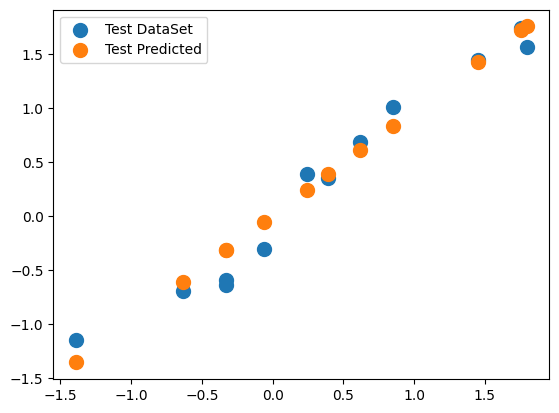

In [36]:
plt.scatter(X_test, y_test, s=100)
plt.scatter(X_test, y_hat, s=100)

plt.legend(['Test DataSet', 'Test Predicted']);

In [37]:
mse(y_hat, y_test)

tensor(0.0322)

In [38]:
y_hat_inverted=y_scaler.inverse_transform(y_hat)

In [39]:
y_test_inverted=y_scaler.inverse_transform(y_test)

In [40]:
X_inverted=x_scaler.inverse_transform(X_test)

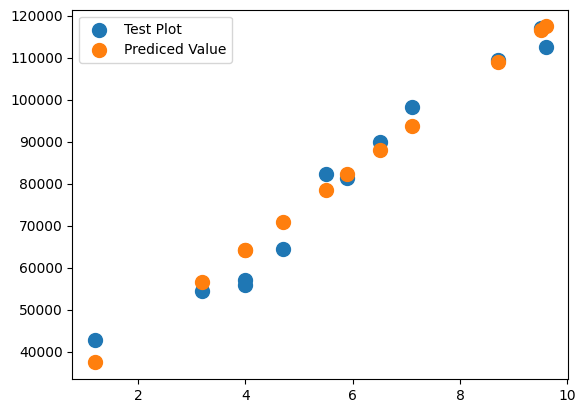

In [41]:
plt.scatter(X_inverted, y_test_inverted, s=100)
plt.scatter(X_inverted, y_hat_inverted, s=100)

plt.legend(['Test Plot', 'Prediced Value']);